## Objective : Predicting Employee Attrition Using Machine Learning

## Data Description 
Dataset used: IBM HR Dataset


## Approach
We perform turnover analysis project by using Python’s Scikit-Learn library. We use Logistic Regression, Random Forest, and Support Vector Machine as classifier for employee attrition and measure the accuracy of models that are built.

# **Step 1 : Data Import and Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost



In [ ]:
""" Loading dataset """

data = '/content/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(data)
df.head(5)


NameError: ignored

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
""" Transpose the describe to make it easier to read. """
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


insights gained from this:
columns such as education that are numerical that actually represent categorical variables may need further investigation.
EmployeeCount is a constant column with all values being 1.
performance rating whilst being on a scale of 1-4, only has 3s and 4s.
Standard Hours is a constant column with all values being 80 hours.

In [ ]:
""" Drop the two constant columns. A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns."""

df.drop(['EmployeeCount','EmployeeNumber', 'StandardHours'],axis=1,inplace=True)

In [ ]:
""" Investigate categorical columns that seem irrelevent. """

df.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [ ]:
""" Drop Over18 as it is also a constant. """

df.drop('Over18',axis=1,inplace=True)

In [ ]:
""" Education colulmn is a categorical variable. Converting it into numerical by giving range between 1 to 5"""

df.replace({'Education':{1:'Below_college', 2:'College', 3:'Bachelor', 4:'Masters', 5:'Doctor'}}, inplace=True)

In [ ]:
""" Iterate through the dataframes columns and covert to lowercase for QoL. """
low_col = []
for i in df.columns:
    i = i.lower()
    low_col.append(i)
df.columns = low_col

In [ ]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager'],
      dtype='object')

In [ ]:
# """ Save this dataframe in its current state before dummying for EDA purposes. """

#df.to_csv('D:\\RSCOE\\EDI Project\\Dataset')

In [ ]:
""" Correlation Matrix """
df.corr()

,age,dailyrate,distancefromhome,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
age,1.000000,0.010661,-0.001686,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
dailyrate,0.010661,1.000000,-0.004985,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
distancefromhome,-0.001686,-0.004985,1.000000,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
environmentsatisfaction,0.010146,0.018355,-0.016075,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
hourlyrate,0.024287,0.023381,0.031131,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
jobinvolvement,0.029820,0.046135,0.008783,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
joblevel,0.509604,0.002966,0.005303,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
jobsatisfaction,-0.004892,0.030571,-0.003669,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
monthlyincome,0.497855,0.007707,-0.017014,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
monthlyrate,0.028051,-0.032182,0.027473,0.037600,-0.015297,-0.016322,0.039563,0.000644,0.034814,1.000000,...,-0.009811,-0.004085,-0.034323,0.026442,0.001467,0.007963,-0.023655,-0.012815,0.001567,-0.036746


In [ ]:
""" Apply Pandas get_dummies function to the dataframe to transform the categorical variables to numeric.
    This will create additional columns in your dataframe."""

df_dum = pd.get_dummies(df)

In [ ]:
""" The shape before and after dummying to see how many new columns have been created. """

print(df.shape)
print(df_dum.shape)

(1470, 31)
(1470, 57)


In [ ]:
df_dum.columns

Index(['age', 'dailyrate', 'distancefromhome', 'environmentsatisfaction',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'attrition_No',
       'attrition_Yes', 'businesstravel_Non-Travel',
       'businesstravel_Travel_Frequently', 'businesstravel_Travel_Rarely',
       'department_Human Resources', 'department_Research & Development',
       'department_Sales', 'education_Bachelor', 'education_Below_college',
       'education_College', 'education_Doctor', 'education_Masters',
       'educationfield_Human Resources', 'educationfield_Life Sciences',
       'educationfield_Marketing', 'educationfield_Medical',
       'educationfield_O

In [ ]:
""" get_dummies has a drop_first parameter, which removes the first column created for each categorical variable
    which acts as a default, however we do not want this to be done for all of our columns, since this is a relatively
    small dataset, i will do this manually."""

df_dum.drop(['gender_Female','overtime_No','attrition_No'],axis=1,inplace=True)

In [ ]:
""" Due to the presence of capital letters in the variables, once again iterate through and convert all the lowercase """
low_col = []
for i in df_dum.columns:
    i = i.lower()
    low_col.append(i)
df_dum.columns = low_col

In [ ]:
df_dum.columns

Index(['age', 'dailyrate', 'distancefromhome', 'environmentsatisfaction',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'attrition_yes',
       'businesstravel_non-travel', 'businesstravel_travel_frequently',
       'businesstravel_travel_rarely', 'department_human resources',
       'department_research & development', 'department_sales',
       'education_bachelor', 'education_below_college', 'education_college',
       'education_doctor', 'education_masters',
       'educationfield_human resources', 'educationfield_life sciences',
       'educationfield_marketing', 'educationfield_medical',
       'educationfield_other', 'educatio

In [ ]:
#""" Export this dummied dataframe to be used in the modelling phase of this project. """
df_dum.to_csv('D:\\RSCOE\\EDI Project\\Dataset')

## **Step 2 : Data Visulization**

In [ ]:
""" Lets have a look at the target variable in this case. """

df.attrition.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: attrition, dtype: object

In [ ]:
""" At the moment, this column is categorical. For use in visualisations etc. this will need to be numeric,
    so lets convert Yes and No, into binary, or 1's and 0's"""

df.loc[df.attrition == 'Yes', 'attrition'] = 1
df.loc[df.attrition == 'No', 'attrition'] = 0

In [ ]:
""" Next, take a look at the value_counts to see the state of the target. """
df.attrition.value_counts()

0    1233
1     237
Name: attrition, dtype: int64

In [ ]:
""" Show the percentage breakdown of the target column."""

print('Percentage breakdown of Attrition')
print('-'*33)
round(df.attrition.value_counts(normalize=True)*100,2)

Percentage breakdown of Attrition
---------------------------------


0    83.88
1    16.12
Name: attrition, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ftr = ['distancefromhome', 'environmentsatisfaction', 'percentsalaryhike', 'worklifebalance', 'businesstravel_non-travel', 'businesstravel_travel_frequently', 
       'businesstravel_travel_rarely', 'department_human resources']

ValueError: ignored

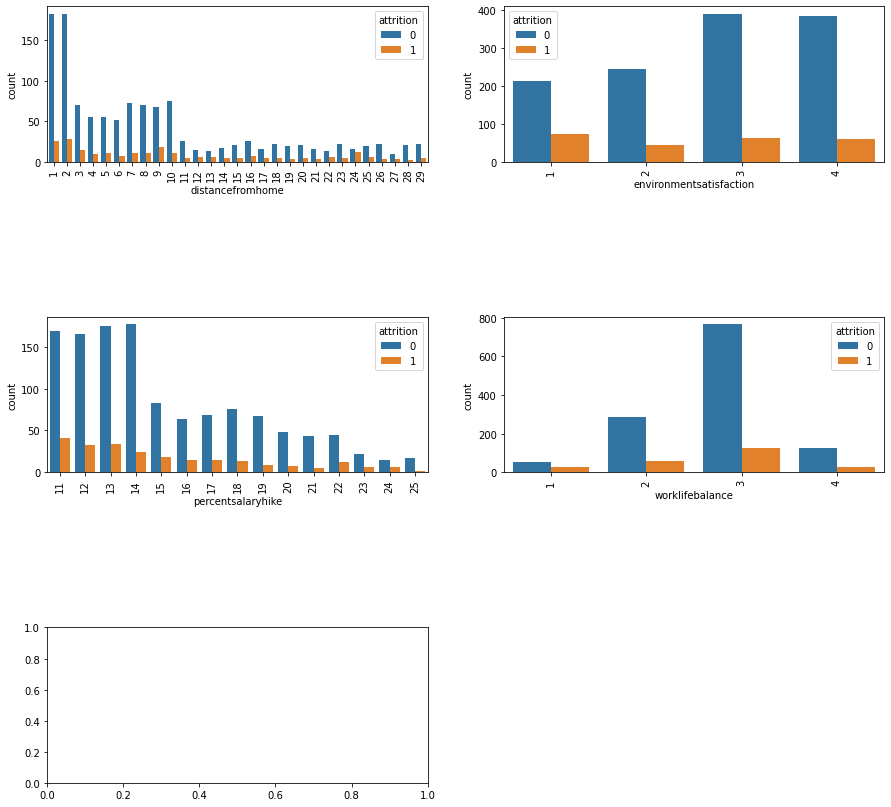

In [ ]:
fig = plt.subplots(figsize=(15, 20))
for p,q in enumerate(ftr):
  plt.subplot(4, 2, p+1)
  plt.subplots_adjust(hspace = 1.0)
  sns.countplot(x = q, data = df, hue = 'attrition')
  plt.xticks(rotation=90)



In [ ]:
""" Plot the distribution of Age. """

plt.figure(figsize=(12,6))
fig = sns.distplot(df.age,kde=False, bins=10, hist_kws=dict(alpha=1))
sns.despine(left=True)
fig.set_xlabel('Age',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.show()

In [ ]:
""" Plot the distribution of Age where attrition is true and false. """

plt.figure(figsize=(12,8))

""" Adjusting the bin size can alter the look of your graph, worth testing different sizes to see various plots. """
fig = sns.distplot(df[df['attrition'] == 0]['age'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['attrition'] == 1]['age'], label='Attrition', kde=0, bins=10)

sns.despine(left=1)

""" Removes the vertical gridlines. """
fig.grid(axis='x')

plt.xlabel('Age',fontsize=15)
plt.ylabel('Density',fontsize=15, rotation=0)
fig.yaxis.labelpad = 30
plt.title('Distribution of Age',fontsize=20);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35

""" Control the size and positioning of the legend. """
plt.legend(fontsize='x-large', bbox_to_anchor=(0.03, 0.95), loc=2, borderaxespad=0., frameon=1)
plt.show()

In [ ]:
print('Female Attrition percentage & count')
print('-'*35)
print(round(df[df.gender == 'Female'].attrition.value_counts(normalize=True)*100,2))
print(df[df.gender == 'Female'].attrition.value_counts())
print('_'*35)
print(''*35)
print('Male Attrition percentage & count')
print('-'*35)
print(round(df[df.gender == 'Male'].attrition.value_counts(normalize=True)*100,2))
print(df[df.gender == 'Male'].attrition.value_counts())
print('_'*35)

In [ ]:
print('Average Monthly Income:',df.monthlyincome.mean())
print('Average Monthly Income for Males:',df[df.gender == 'Male']['monthlyincome'].mean())
print('Average Monthly Income for Females:',df[df.gender == 'Female']['monthlyincome'].mean())

In [ ]:
""" Start by loading in the dummied dataset we created earlier for modelling. """
data = '/content/D:\RSCOE\EDI Project\Dataset'
df = pd.read_csv(data, index_col=0)

""" Convert all to float. """
df = df.astype(float)

df.shape

In [ ]:
df.rename({'attrition_yes':'attrition'}, axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
""" Seperate dataframe into the target and features. """
X = df.drop('attrition', axis=1)
y = df.attrition

# **Step 3: Train and Test Data**

In [ ]:
""" Split the dataframe into the train and test groups. The split size can be specified, for this i am
    setting aside 20% for the testing data."""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
""" Find our baseline accuracy, using value_counts and taking the dominating class since this is a binary target.
    Our baseline accuracy is 83.9%"""
y.value_counts(normalize=True)

# **Step 4: Model Training**
# **Step 5: Performance Evaluation**


In [ ]:
""" Defining the models i am going to use into a list. """
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]
    
""" Logging for visual comparison. """ 

log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

""" Iterate through each classification model stated above, fitting the model to the train data and finally
    printing the accuracy and log loss of each model. """

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

In [ ]:
# Getting the predicted values on the train set
for clf in classifiers:
  y_train_pred = clf.predict(X_train)
  print(y_train_pred[:30]) 


In [ ]:
X_train.head(5)

Checking if predictions are correct on train data.
Above matrix shows that all the models have predicted attirition as No. And models with less accurarcy has predicted some values as Yes.